# **EDA.**

## **Librerías.**

In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings  
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression            # clasificar  

from sklearn.preprocessing import StandardScaler               # estandarizar
from sklearn.preprocessing import LabelEncoder               

from sklearn.model_selection import train_test_split as tts    # dividir los datos en conjuntos de "train" y "test"


## **Cargar datos.**

In [2]:
# cargar datos "train"
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

## **Transformar datos.**

### **Train.**

In [3]:
train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [4]:
# info "train"
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [5]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Manufacturer,977,19,Dell,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model Name,977,488,XPS 13,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,977,6,Notebook,549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Screen Size,977,18,"15.6""",494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Screen,977,38,Full HD 1920x1080,397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPU,977,106,Intel Core i5 7200U 2.5GHz,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RAM,977,8,8GB,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Storage,977,36,256GB SSD,318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPU,977,98,Intel HD Graphics 620,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Operating System,977,7,Windows,837,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# observar columna "Operating System Version"

train['Operating System Version'].unique()

array([nan, '10', 'X', '10 S', '7'], dtype=object)

In [7]:
# "Operating System Version" no aporta valor, teniendo nulos, la eliminamos
train = train.drop('Operating System Version', axis=1)

train.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System', 'Weight', 'Price'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Model Name        977 non-null    object 
 2   Category          977 non-null    object 
 3   Screen Size       977 non-null    object 
 4   Screen            977 non-null    object 
 5   CPU               977 non-null    object 
 6   RAM               977 non-null    object 
 7    Storage          977 non-null    object 
 8   GPU               977 non-null    object 
 9   Operating System  977 non-null    object 
 10  Weight            977 non-null    object 
 11  Price             977 non-null    float64
dtypes: float64(1), object(11)
memory usage: 91.7+ KB


In [10]:
# transformar columnas categoricas a numericas

# normalizar
norm_num = pd.DataFrame(StandardScaler().fit_transform(train._get_numeric_data()), columns=train._get_numeric_data().columns)


norm_obj = train.select_dtypes(include='object')

norm = pd.concat([norm_num, norm_obj], axis=1)

norm.head()

,Price,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight
0,0.300407,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,-0.321364,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,-0.778350,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,1.990101,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,0.954851,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg


In [11]:
# label encoder
le = LabelEncoder()

for c in norm.columns:
    
    if norm.dtypes[c]==object:
        
        le.fit(norm[c].astype(str))
        
        norm[c]=le.transform(norm[c].astype(str))

norm.head()

,Price,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight
0,0.300407,1,236,4,7,23,58,7,2,51,6,36
1,-0.321364,1,237,4,7,1,56,7,0,45,6,33
2,-0.778350,7,38,3,14,8,67,7,15,47,4,72
3,1.990101,1,236,4,13,25,77,1,27,7,6,69
4,0.954851,1,236,4,7,23,60,7,15,52,6,36


In [13]:
norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             977 non-null    float64
 1   Manufacturer      977 non-null    int64  
 2   Model Name        977 non-null    int64  
 3   Category          977 non-null    int64  
 4   Screen Size       977 non-null    int64  
 5   Screen            977 non-null    int64  
 6   CPU               977 non-null    int64  
 7   RAM               977 non-null    int64  
 8    Storage          977 non-null    int64  
 9   GPU               977 non-null    int64  
 10  Operating System  977 non-null    int64  
 11  Weight            977 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 91.7 KB


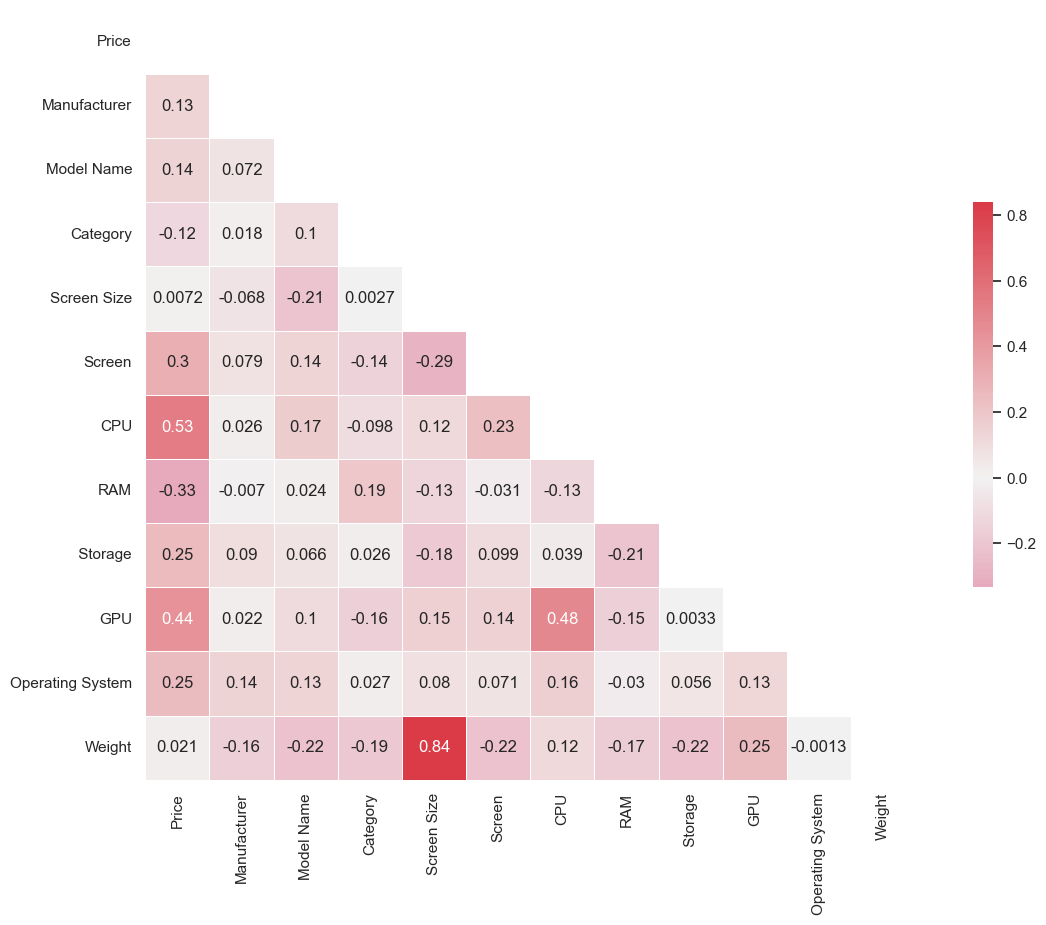

In [16]:
# observar correlacion de columnas
numeric_columns = norm.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.set(style='white')
cmap=sns.diverging_palette(0, 10, as_cmap=True)
plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5});

In [17]:
# eliminar columna "Screen Size" al estar correlacionada
norm = norm.drop('Screen Size', axis=1)

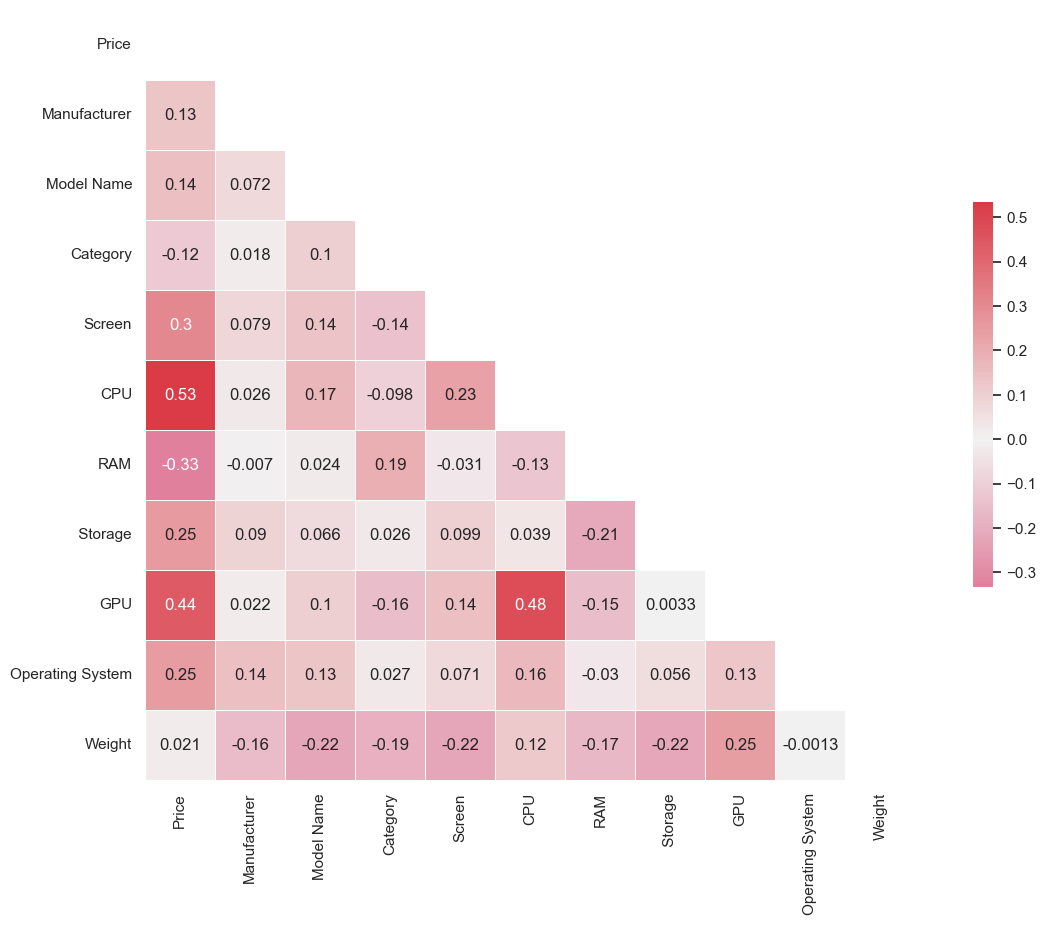

In [18]:
# observar correlacion de nuevo
numeric_columns = norm.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.set(style='white')
cmap=sns.diverging_palette(0, 10, as_cmap=True)
plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5});

### **Test.**

In [14]:
test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              325 non-null    object
 1   Model Name                325 non-null    object
 2   Category                  325 non-null    object
 3   Screen Size               325 non-null    object
 4   Screen                    325 non-null    object
 5   CPU                       325 non-null    object
 6   RAM                       325 non-null    object
 7    Storage                  325 non-null    object
 8   GPU                       325 non-null    object
 9   Operating System          325 non-null    object
 10  Operating System Version  291 non-null    object
 11  Weight                    325 non-null    object
dtypes: object(12)
memory usage: 30.6+ KB
